<a href="https://colab.research.google.com/github/shw5652/dlLab/blob/main/102297007_Shweta_Kumari_DL7_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name : Shweta Kumari

Roll : 102297007

Class : CS7


---



Deep Learning

Lab Assignment : 07


---



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
data=pd.read_csv("/content/Google_Stock_Price_Train.csv")
data

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [3]:
data=data.iloc[:,1:2]
data

,Open
0,325.25
1,331.27
2,329.83
3,328.34
4,322.04
...,...
1253,790.90
1254,790.68
1255,793.70
1256,783.33


In [4]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()


In [5]:
data=sc.fit_transform(data)
data

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [6]:
X_train=data[0:1257]
y_train=data[1:1258]

In [7]:
X_train=np.reshape(X_train, (1257, 1, 1))

In [8]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [9]:
regressor=Sequential()

In [10]:
regressor.add(LSTM(units=4, activation='sigmoid', input_shape=(None, 1)))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
regressor.add(Dense(units=1))

In [12]:
regressor.compile(optimizer='adam', loss='mean_squared_error')

In [13]:
regressor.fit(X_train, y_train, batch_size=32, epochs=200)

Epoch 1/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.8424
Epoch 2/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7259
Epoch 3/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5395
Epoch 4/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4425
Epoch 5/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3461
Epoch 6/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2717
Epoch 7/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2219
Epoch 8/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1762
Epoch 9/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1483
Epoch 10/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1163
Epoch 11/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1038
Epoch 12/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0937
Epoch 13/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0819
Epoch 14/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0787
Epoch 15/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0726
Epoc

In [14]:
test_data=pd.read_csv("/content/Google_Stock_Price_Test.csv")
test_data

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"
5,1/10/2017,807.86,809.13,803.51,804.79,"1,176,800"
6,1/11/2017,805.00,808.15,801.37,807.91,"1,065,900"
7,1/12/2017,807.14,807.39,799.17,806.36,"1,353,100"
8,1/13/2017,807.48,811.22,806.69,807.88,"1,099,200"
9,1/17/2017,807.08,807.14,800.37,804.61,"1,362,100"


In [15]:
real_stock_price=test_data.iloc[:,1:2].values
real_stock_price

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

In [16]:
inputs=real_stock_price

In [17]:
inputs=sc.transform(inputs)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [18]:
inputs=np.reshape(inputs, (20, 1, 1))

In [19]:
test_pred=regressor(inputs)

In [20]:
test_pred=sc.inverse_transform(test_pred)

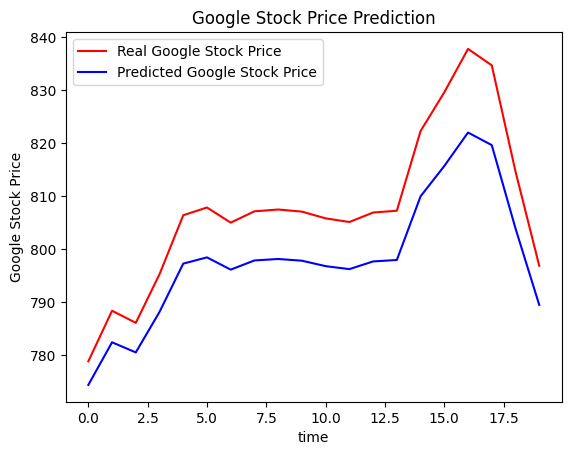

In [21]:
plt.plot(real_stock_price, color='red', label='Real Google Stock Price')
plt.plot(test_pred, color='blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()